#🛠 Preliminary Operation

## Drive

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import

In [ ]:
import h5py
import pandas as pd
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Tokenization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

## Keras

In [ ]:
from tensorflow import keras
from keras.models import Model, load_model
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Embedding, Bidirectional, GRU, LSTM, SpatialDropout1D, Dropout
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense, Conv1D, GlobalMaxPool1D, GlobalAveragePooling1D, SpatialDropout1D, Concatenate, Flatten, Convolution1D, MaxPool1D, MaxPooling1D, BatchNormalization

# Tokenization
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

keras.utils.set_random_seed(42)
precision_metric = Precision()
recall_metric = Recall()
auc_metric = AUC()

#💾 Dataset

## Read CSV

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/ESED.csv")

In [ ]:
print(df)

           CWE      ID                                             Source  \
0      CWE-134    1555  \n\n#include <stdio.h>\n\nvoid\ntest(char *str...   
1      CWE-134    1556  \n\n#include <stdio.h>\n\nvoid\ntest(char *str...   
2      CWE-134    1558  \n\n#include <syslog.h>\n\nvoid\ntest(char *st...   
3       CWE-20    1646  \n\n#include <stdio.h>\n#include <stdlib.h>\n#...   
4      CWE-121    1544  \n\n#include <stdio.h>\n#include <string.h>\n\...   
...        ...     ...                                                ...   
73471  CWE-843  231379  \n\n#ifdef HAVE_CONFIG_H\n# include "config.h"...   
73472  CWE-788  231379  \n\n#ifdef HAVE_CONFIG_H\n# include "config.h"...   
73473  CWE-674  148918  \n\n#ifdef HAVE_CONFIG_H\n#include "config.h"\...   
73474  CWE-476  148918  \n\n#ifdef HAVE_CONFIG_H\n# include "config.h"...   
73475  CWE-476  231380  \n\n#ifdef HAVE_CONFIG_H\n#include "config.h"\...   

                                                  Region  
0               

In [ ]:
# Conta gli esempi per ogni classe
class_counts = df['CWE'].value_counts()
print(class_counts)

CWE
CWE-122     5954
CWE-78      5118
CWE-121     5010
CWE-190     4089
CWE-762     3564
            ... 
CWE-1260       1
CWE-662        1
CWE-413        1
CWE-440        1
CWE-691        1
Name: count, Length: 189, dtype: int64


## Filter class

In [ ]:
# Filtra le classi con almeno 400 esempi
classes_to_keep = class_counts[class_counts >= 400].index
filtered_df = df[df['CWE'].isin(classes_to_keep)]

print(filtered_df)

           CWE      ID                                             Source  \
0      CWE-134    1555  \n\n#include <stdio.h>\n\nvoid\ntest(char *str...   
1      CWE-134    1556  \n\n#include <stdio.h>\n\nvoid\ntest(char *str...   
2      CWE-134    1558  \n\n#include <syslog.h>\n\nvoid\ntest(char *st...   
4      CWE-121    1544  \n\n#include <stdio.h>\n#include <string.h>\n\...   
5      CWE-121    1545  \n\n#include <stdio.h>\n#include <string.h>\n\...   
...        ...     ...                                                ...   
73449  CWE-369  231369  \n\n\n\n#ifdef HAVE_CONFIG_H\n#include "config...   
73450  CWE-400  231370  \n\n#ifdef HAVE_CONFIG_H\n# include "config.h"...   
73454  CWE-457  231371  \n\n \n\n#ifdef HAVE_CONFIG_H\n# include "conf...   
73474  CWE-476  148918  \n\n#ifdef HAVE_CONFIG_H\n# include "config.h"...   
73475  CWE-476  231380  \n\n#ifdef HAVE_CONFIG_H\n#include "config.h"\...   

                                                  Region  
0               

In [ ]:
# Conta gli esempi per ogni classe
class_counts = filtered_df['CWE'].value_counts()
print(class_counts)

CWE
CWE-122    5954
CWE-78     5118
CWE-121    5010
CWE-190    4089
CWE-762    3564
CWE-191    3172
CWE-134    2938
CWE-590    2725
CWE-23     2400
CWE-36     2400
CWE-124    2206
CWE-127    2203
CWE-401    1777
CWE-126    1745
CWE-476    1479
CWE-195    1255
CWE-194    1254
CWE-119    1179
CWE-789    1078
CWE-415    1014
CWE-369     975
CWE-197     971
CWE-457     966
CWE-690     960
CWE-400     909
CWE-253     684
CWE-252     633
CWE-761     614
CWE-680     583
CWE-758     581
CWE-114     576
CWE-416     518
CWE-563     516
CWE-606     490
CWE-427     480
CWE-90      480
CWE-89      469
Name: count, dtype: int64


## Split train, val, test

In [ ]:
# split train (70%) e temp (30%)
train_df, temp_df = train_test_split(filtered_df, test_size=0.3, stratify=filtered_df['CWE'], random_state=42)

# Fai lo split del DataFrame temp in validation (10%) e test (20%)
val_df, test_df = train_test_split(temp_df, test_size=2/3, stratify=temp_df['CWE'], random_state=42)

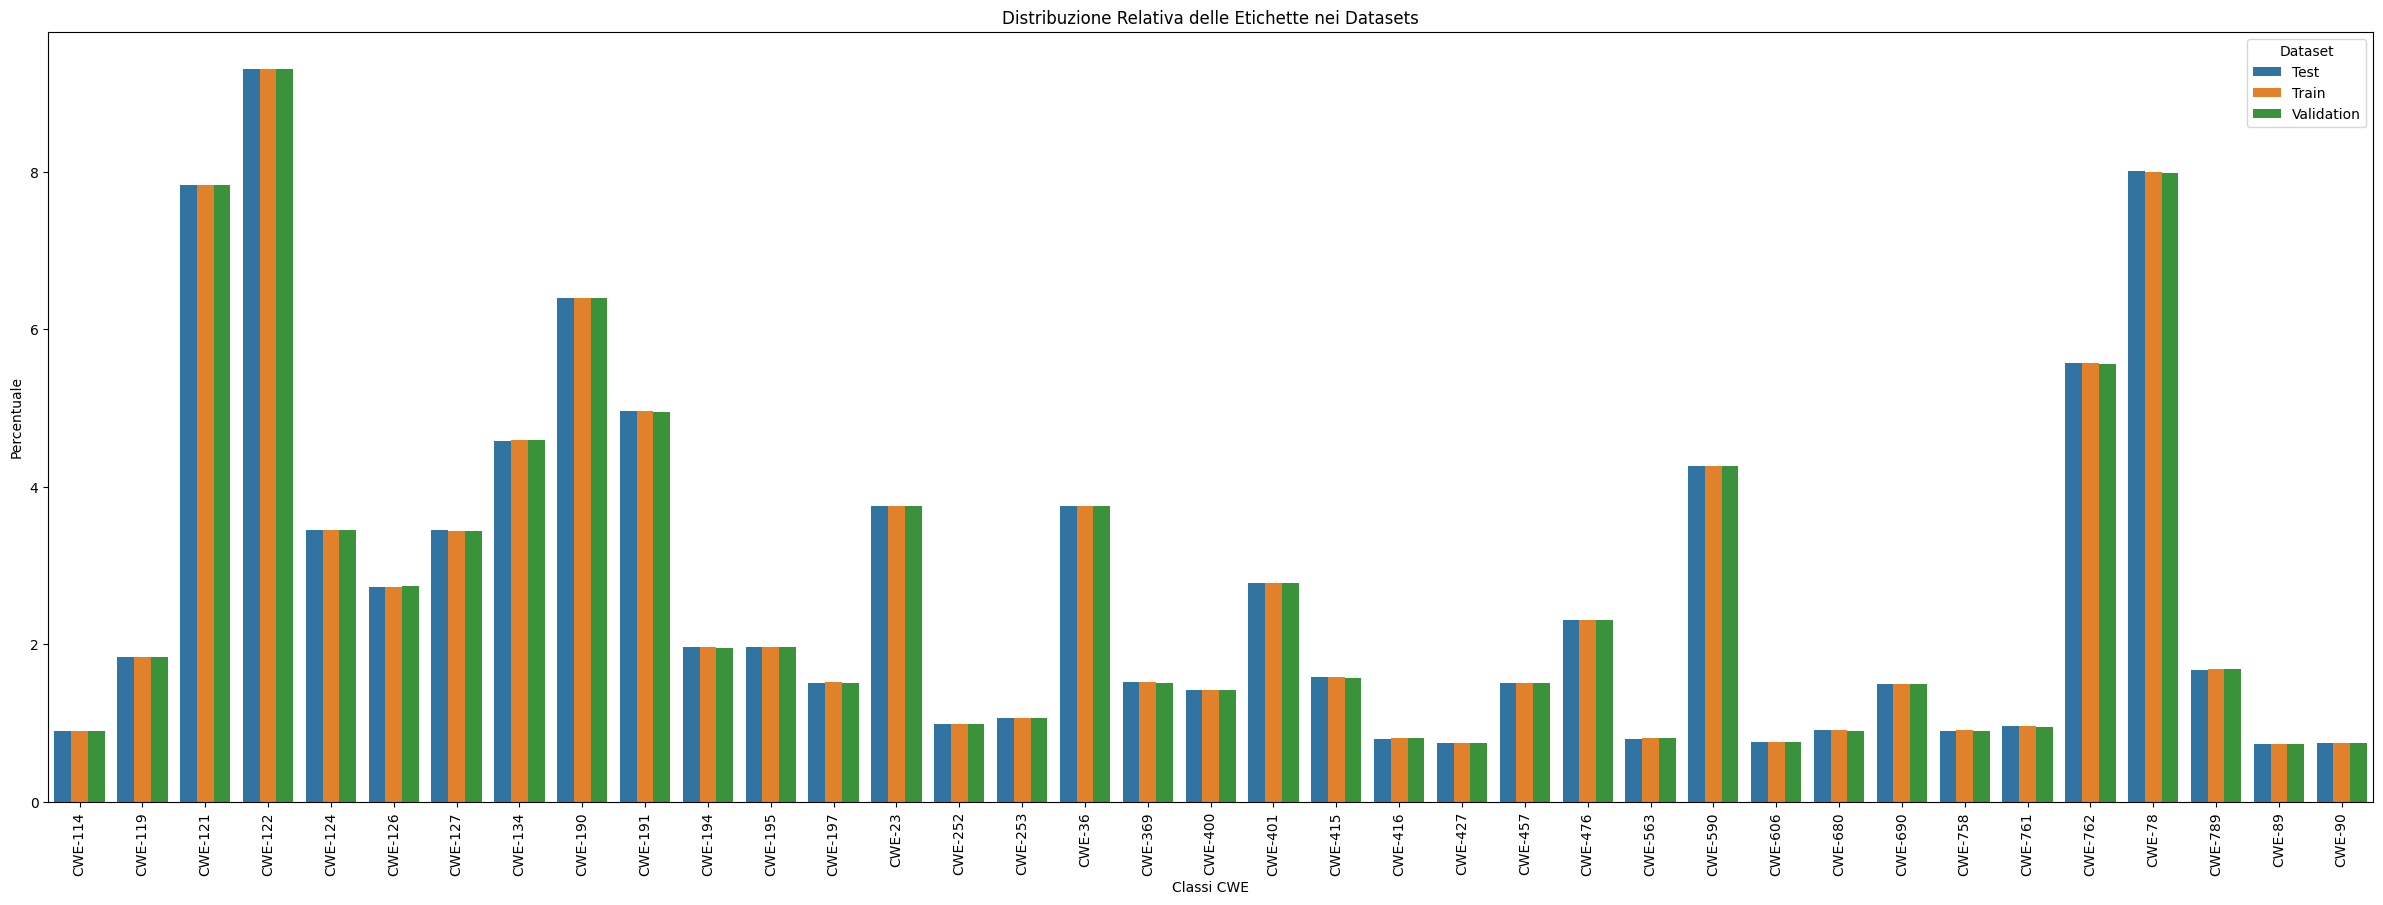

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estrai le colonne di etichette
label_columns = ['CWE']

# Concatenare i DataFrame per facilitare il plotting
train_df['Dataset'] = 'Train'
val_df['Dataset'] = 'Validation'
test_df['Dataset'] = 'Test'

combined_df = pd.concat([train_df, val_df, test_df])

# Calcolare le distribuzioni relative
total_counts = combined_df.groupby('Dataset')['CWE'].count()
relative_counts = combined_df.groupby(['Dataset', 'CWE']).size() / total_counts * 100
relative_counts = relative_counts.reset_index(name='Percentage')

# Plot dei valori relativi
plt.figure(figsize=(30, 10))
sns.barplot(data=relative_counts, x='CWE', y='Percentage', hue='Dataset')
plt.title('Distribuzione Relativa delle Etichette nei Datasets')
plt.xlabel('Classi CWE')
plt.ylabel('Percentuale')
plt.xticks(rotation=90)
plt.legend(title='Dataset')
plt.show()

#🗣 Tokenization

In [ ]:
WORDS_SIZE=20000
INPUT_SIZE=500

## Tokenization process

In [ ]:
# Tokenizer with word-level
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(list(train_df['Source']))

### Check sequence length

count     44775.000000
mean       5283.962881
std       15162.082212
min          44.000000
25%        1525.000000
50%        2263.000000
75%        3755.500000
max      456092.000000
Name: Source, dtype: float64


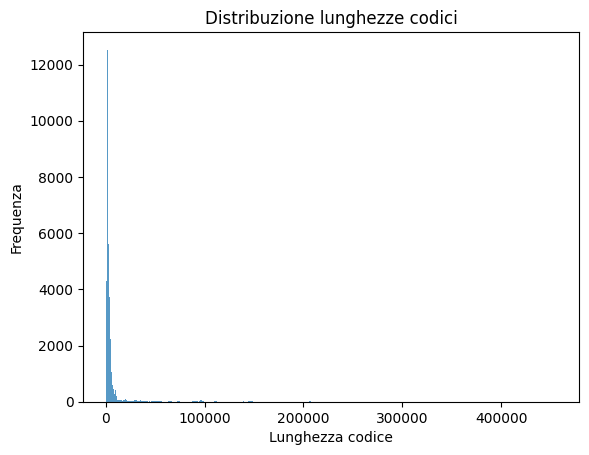

In [ ]:
code_lengths = train_df['Source'].apply(len)
print(code_lengths.describe())

plt.hist(code_lengths, bins=500, alpha = 0.75)
plt.xlabel('Lunghezza codice')
plt.ylabel('Frequenza')
plt.title('Distribuzione lunghezze codici')
plt.show()

### Check words

In [ ]:
print('Number of tokens: ', len(tokenizer.word_counts))

Number of tokens:  59593


In [ ]:
# Reducing to top N words
tokenizer.num_words = WORDS_SIZE

# Top 10 words
sorted(tokenizer.word_counts.items(), key=lambda x:x[1], reverse=True)[0:10]

[('data', 782817),
 ('0', 767025),
 ('if', 657152),
 ('1', 525228),
 ('t', 444941),
 ('void', 439597),
 ('char', 407971),
 ('int', 382574),
 ('i', 278333),
 ('return', 237761)]

## Create Sequence

### Train

In [ ]:
## Tokkenizing train data and create matrix
train_sequences = tokenizer.texts_to_sequences(train_df['Source'])
x_train = pad_sequences(train_sequences, maxlen=INPUT_SIZE, padding='post')
x_train = x_train.astype(np.int64)

In [ ]:
# Salva per future esecuzioni
np.save('/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/x_train_500.npy', x_train)

### Validation

In [ ]:
## Tokkenizing train data and create matrix
val_sequences = tokenizer.texts_to_sequences(val_df['Source'])
x_val = pad_sequences(val_sequences, maxlen=INPUT_SIZE, padding='post')
x_val = x_val.astype(np.int64)

In [ ]:
# Salva per future esecuzioni
np.save('/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/x_val_500.npy', x_val)

### Test

In [ ]:
## Tokkenizing train data and create matrix
test_sequences = tokenizer.texts_to_sequences(test_df['Source'])
x_test = pad_sequences(test_sequences, maxlen=INPUT_SIZE, padding='post')
x_test = x_test.astype(np.int64)

In [ ]:
# Salva per future esecuzioni
np.save('/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/x_test_500.npy', x_test)

## Import sequence

In [ ]:
x_train = np.load('/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/x_train_500.npy')
x_val = np.load('/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/x_val_500.npy')
x_test = np.load('/content/drive/My Drive/Sicurezza_approfondimento/dataset/ESED/x_test_500.npy')

#✅ Label

In [ ]:
label_columns = ['CWE']

y_train = train_df[label_columns]
y_val= val_df[label_columns]
y_test= test_df[label_columns]

In [ ]:
# Inizializza il OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Esegui la one-hot encoding su y_train, y_val e y_test
y_train_encoded = onehot_encoder.fit_transform(y_train)
y_val_encoded = onehot_encoder.transform(y_val)
y_test_encoded = onehot_encoder.transform(y_test)

# Visualizza i risultati
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_val_encoded shape:", y_val_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

y_train_encoded shape: (44775, 37)
y_val_encoded shape: (6396, 37)
y_test_encoded shape: (12794, 37)


#🧠 RNN  con filter class > 400, seq 500, words 20.000

In [ ]:
check_path_RNN = '/content/drive/My Drive/Sicurezza_approfondimento/RNN_400_500_20000/ESED/Best_Model/best_RNN_unimb.h5'

## Model

In [ ]:
inp = Input(shape=(500, ), name = 'input_layer')

embedding_layer = Embedding(input_dim = WORDS_SIZE,
                            output_dim = 32,
                            name ='embedding_layer')(inp)

x = SpatialDropout1D(0.5, name='spatial_dropout')(embedding_layer)
x = Bidirectional(LSTM(128, return_sequences=False, dropout = 0.5, name='lstm_layer'))(x)
x = Dropout(0.5, name = 'dropout_layer')(x)
x = Dense(64, activation="relu", name = 'dense_layer')(x)
x = Dropout(0.5, name = 'dropout_layer_2')(x)

output = Dense(y_train_encoded.shape[1], activation='softmax', name = 'output')(x)

model_rnn = Model(inputs=inp, outputs = output)
model_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 500)]             0         
                                                                 
 embedding_layer (Embedding  (None, 500, 32)           640000    
 )                                                               
                                                                 
 spatial_dropout (SpatialDr  (None, 500, 32)           0         
 opout1D)                                                        
                                                                 
 bidirectional (Bidirection  (None, 256)               164864    
 al)                                                             
                                                                 
 dropout_layer (Dropout)     (None, 256)               0         
                                                             

In [ ]:
model_rnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', precision_metric, recall_metric])

## Training

In [ ]:
checkpoint = ModelCheckpoint(check_path_RNN, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, mode="auto", restore_best_weights=True, start_from_epoch=10)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model_rnn.fit(
    x = x_train,
    y = y_train_encoded,
    validation_data = (x_val, y_val_encoded),
    batch_size = 2048,
    epochs = 200,
    callbacks = callbacks_list,
    )

import pickle
with open('/content/drive/My Drive/Sicurezza_approfondimento/RNN_400_500_20000/ESED/Best_Model/history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Epoch 1/200
22/22 [==============================] - ETA: 0s - loss: 3.5047 - accuracy: 0.0654 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_loss improved from inf to 3.31684, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_400_500_20000/ESED/Best_Model/best_RNN_unimb.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 32s 645ms/step - loss: 3.5047 - accuracy: 0.0654 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.3168 - val_accuracy: 0.0930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
22/22 [==============================] - ETA: 0s - loss: 3.1528 - accuracy: 0.1218 - precision: 0.4560 - recall: 0.0111
Epoch 2: val_loss improved from 3.31684 to 2.81295, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_400_500_20000/ESED/Best_Model/best_RNN_unimb.h5
22/22 [==============================] - 13s 576ms/step - loss: 3.1528 - accuracy: 0.1218 - precision: 0.4560 - recall: 0.0111 - val_loss: 2.8129 - val_accuracy: 0.2531 - val_precision: 1.0000 - val_recall: 0.0053
Epoch 3/200
22/22 [==============================] - ETA: 0s - loss: 2.6542 - accuracy: 0.2117 - precision: 0.6250 - recall: 0.0715
Epoch 3: val_loss improved from 2.81295 to 2.33380, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_

## Test

In [ ]:
model_rnn = tf.keras.models.load_model("/content/drive/My Drive/Sicurezza_approfondimento/RNN_400_500_20000/ESED/Best_Model/best_RNN_unimb.h5")

In [ ]:
predicted = model_rnn.predict(x_test)

400/400 [==============================] - 6s 14ms/step


In [ ]:
predicted = predicted.argmax(axis=1)
predicted

# Convertire le etichette vere da one-hot encoding a etichette semplici
y_test_true = y_test_encoded.argmax(axis=1)
y_test_true

array([26,  2,  4, ..., 24, 26, 19])

In [ ]:
from sklearn.metrics import classification_report

#print(classification_report(y_test_encoded, predicted, target_names=label_columns))
report = classification_report(y_test_true, predicted, target_names=onehot_encoder.categories_[0])
print(report)

              precision    recall  f1-score   support

     CWE-114       0.98      0.99      0.99       115
     CWE-119       0.99      1.00      0.99       236
     CWE-121       0.98      0.99      0.99      1002
     CWE-122       0.99      1.00      0.99      1191
     CWE-124       0.98      0.97      0.97       441
     CWE-126       0.98      0.87      0.92       349
     CWE-127       0.98      0.95      0.97       441
     CWE-134       0.99      0.99      0.99       587
     CWE-190       1.00      0.99      1.00       818
     CWE-191       0.98      0.98      0.98       635
     CWE-194       0.99      0.98      0.98       251
     CWE-195       0.99      0.95      0.97       251
     CWE-197       0.96      0.93      0.95       194
      CWE-23       1.00      1.00      1.00       480
     CWE-252       1.00      0.99      1.00       127
     CWE-253       1.00      1.00      1.00       137
      CWE-36       1.00      1.00      1.00       480
     CWE-369       0.99    

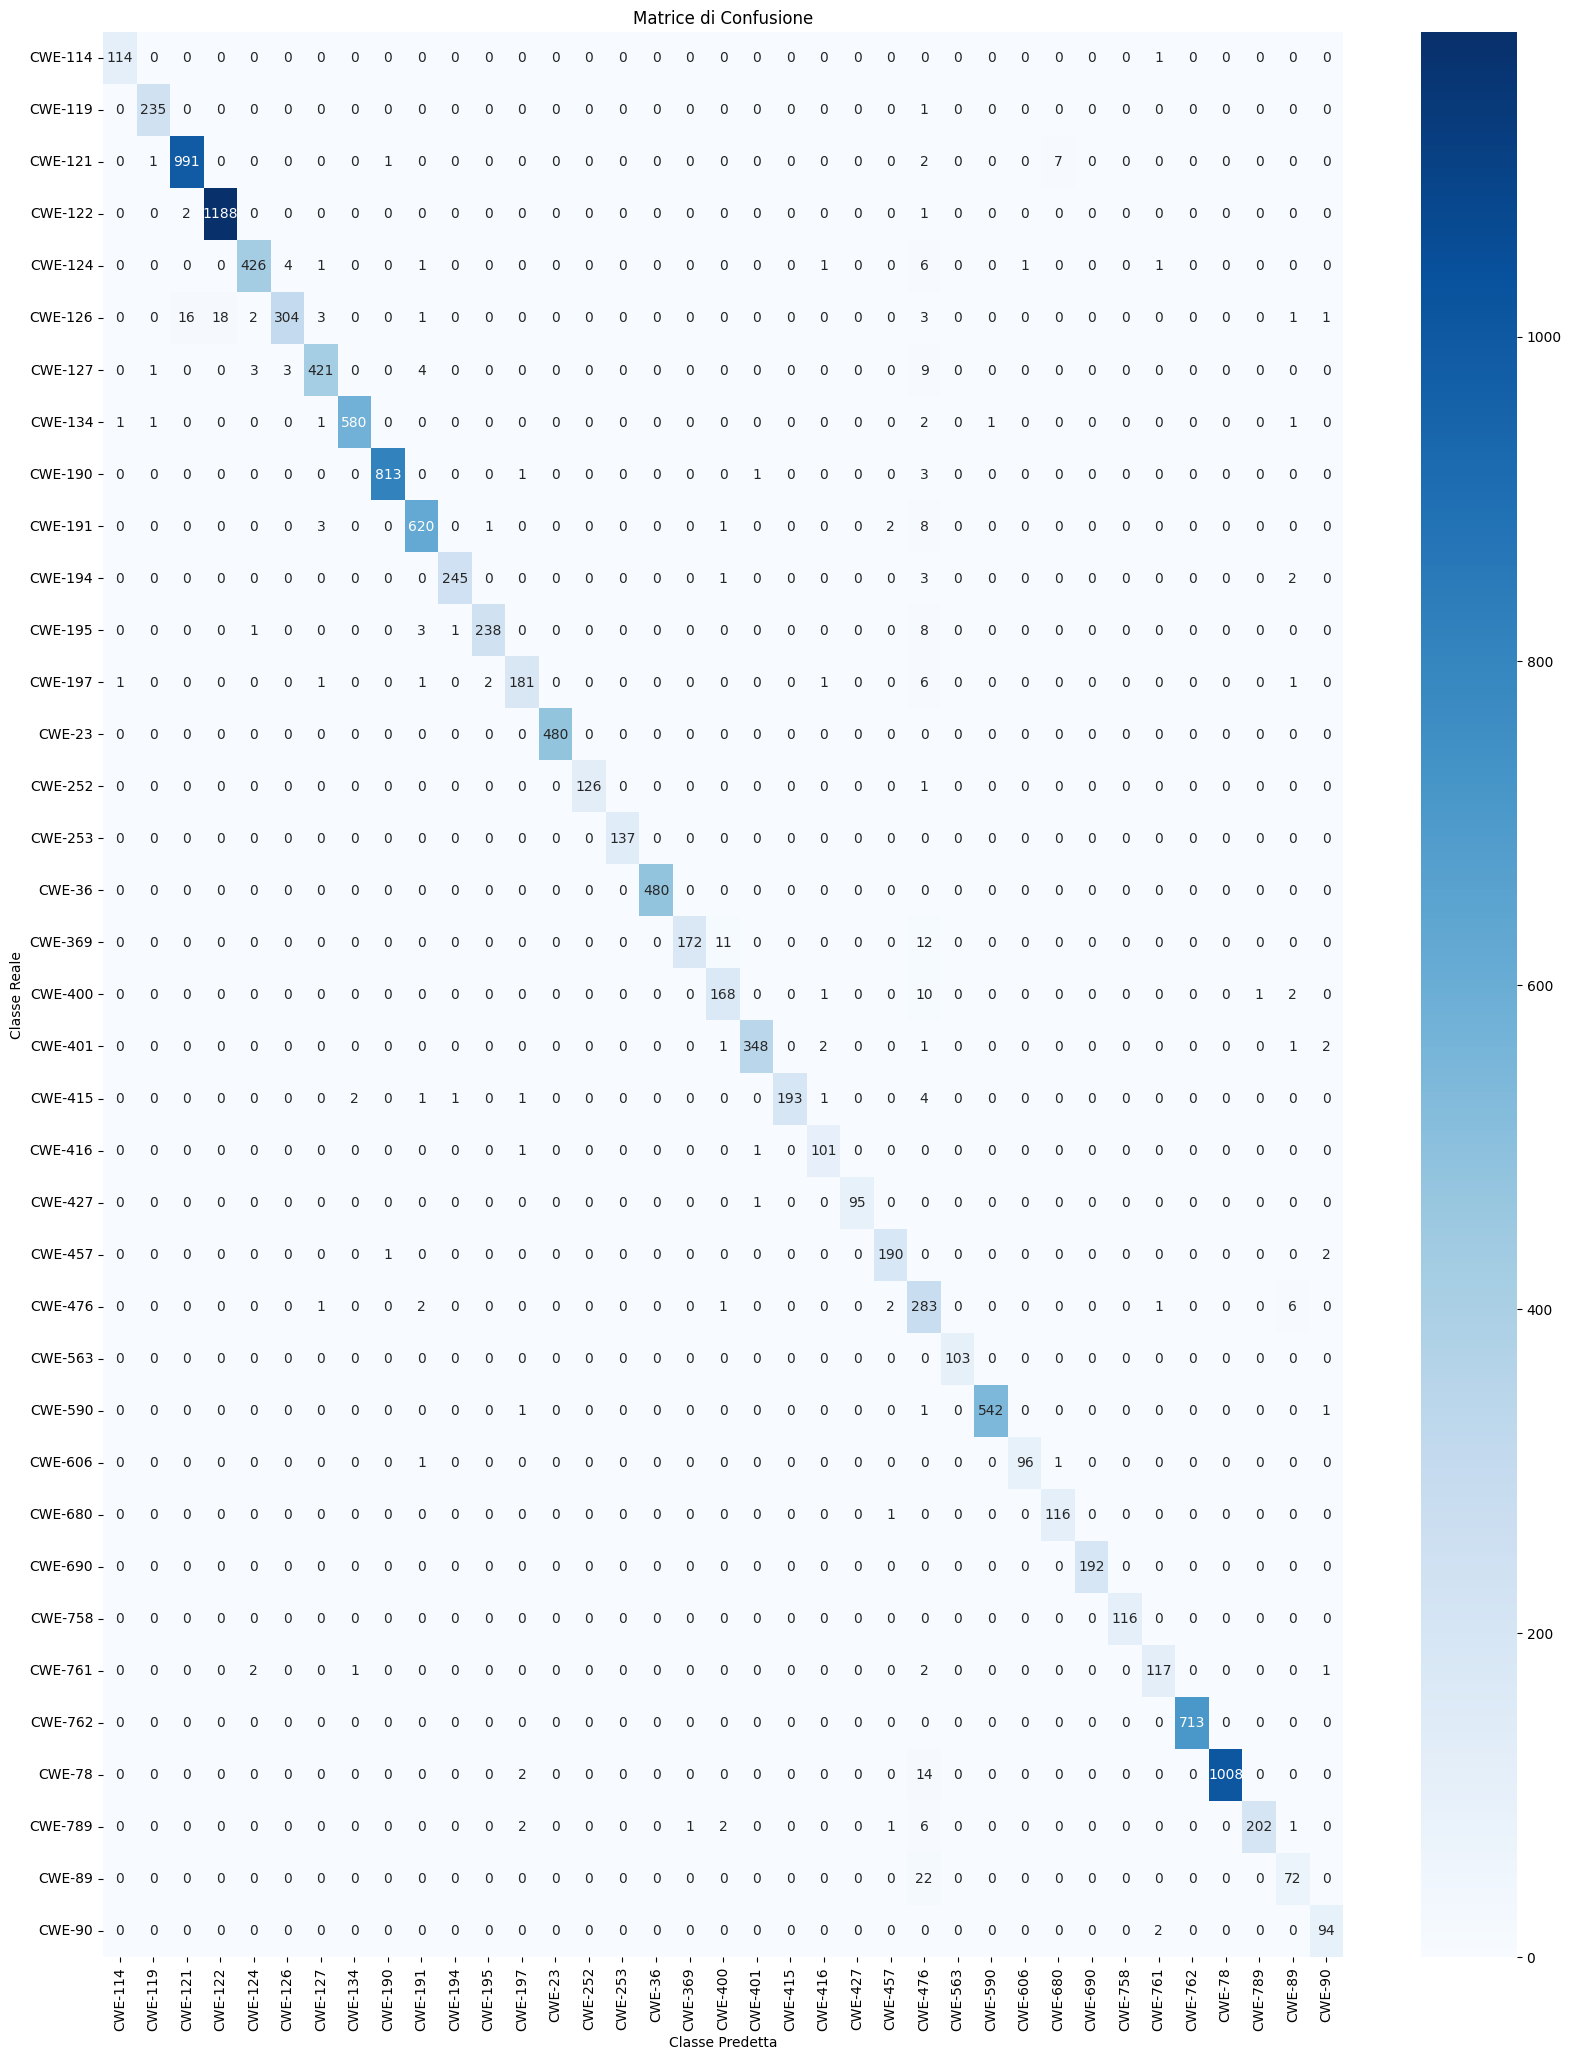

In [ ]:
# prompt: want to generate the confusion matrix

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_true, predicted)

# Creazione del plot della matrice di confusione
plt.figure(figsize=(20, 25))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=onehot_encoder.categories_[0], yticklabels=onehot_encoder.categories_[0])
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()

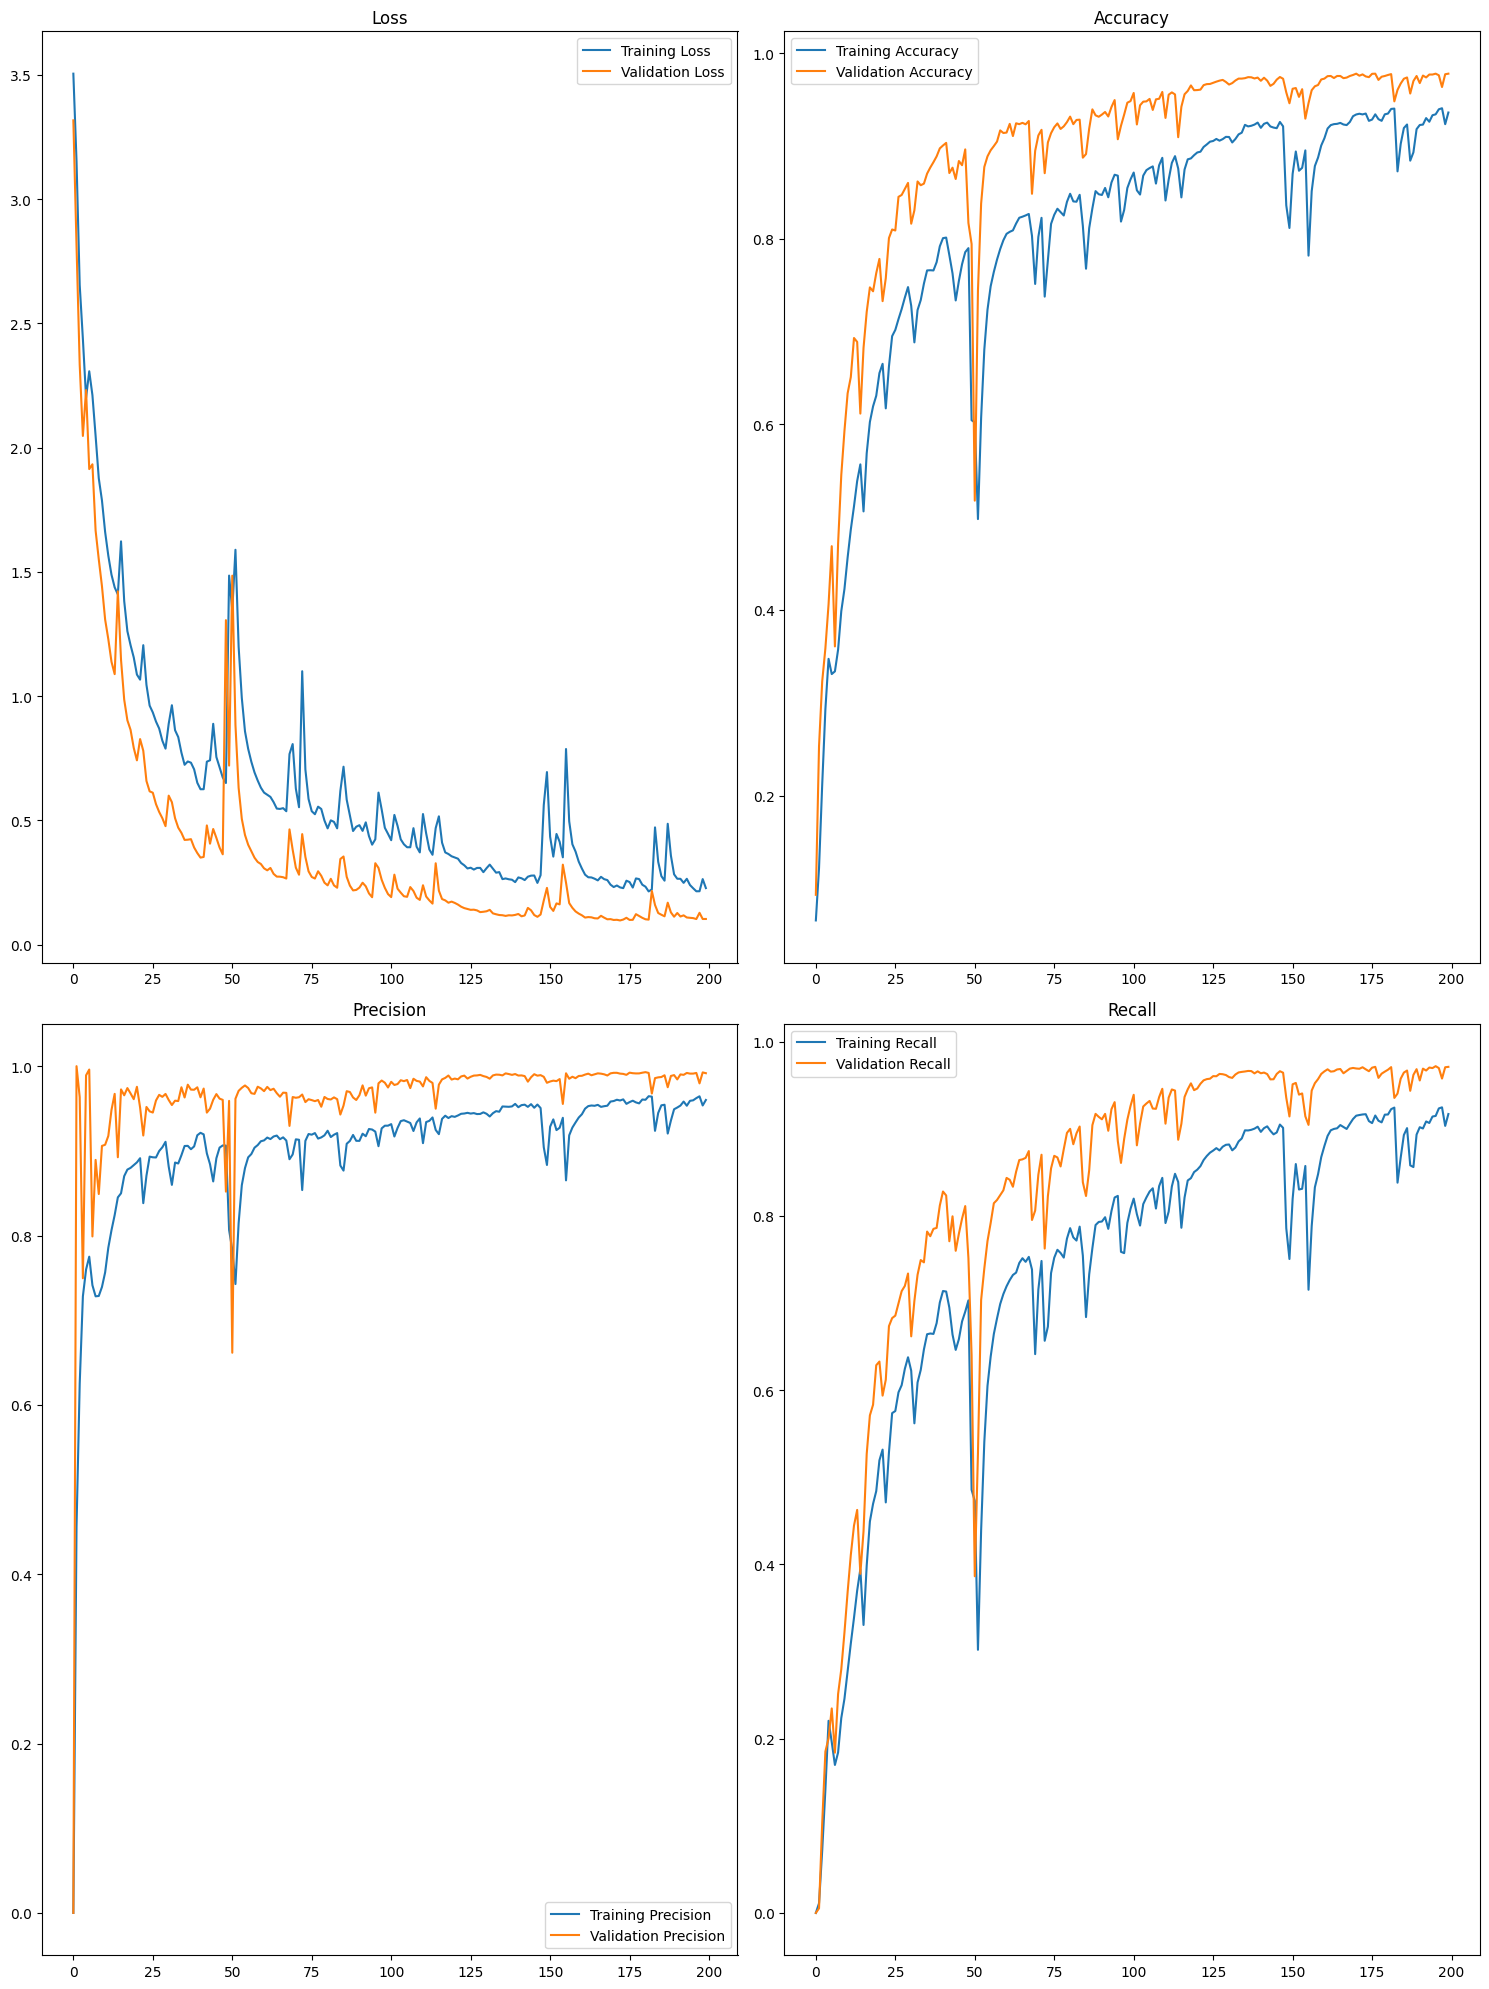

In [ ]:
import matplotlib.pyplot as plt

# Creiamo una figura
plt.figure(figsize=(15, 20))

# Grafico per la loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Grafico per l'accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Grafico per la precision
plt.subplot(2, 2, 3)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision')
plt.legend()

# Grafico per il recall
plt.subplot(2, 2, 4)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall')
plt.legend()

# Mostriamo la figura
plt.tight_layout()
plt.show()


#🧠 RNN con filter class > 1.000, seq 500, words 20.000

In [ ]:
check_path_RNN = '/content/drive/My Drive/Sicurezza_approfondimento/RNN_1000_500_20000/ESED/Best_Model/best_RNN_unimb.h5'

## Model

In [ ]:
inp = Input(shape=(500, ), name = 'input_layer')

embedding_layer = Embedding(input_dim = WORDS_SIZE,
                            output_dim = 32,
                            name ='embedding_layer')(inp)

x = SpatialDropout1D(0.5, name='spatial_dropout')(embedding_layer)
x = Bidirectional(LSTM(128, return_sequences=False, dropout = 0.5, name='lstm_layer'))(x)
x = Dropout(0.5, name = 'dropout_layer')(x)
x = Dense(64, activation="relu", name = 'dense_layer')(x)
x = Dropout(0.5, name = 'dropout_layer_2')(x)

output = Dense(y_train_encoded.shape[1], activation='softmax', name = 'output')(x)

model_rnn = Model(inputs=inp, outputs = output)
model_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 500)]             0         
                                                                 
 embedding_layer (Embedding  (None, 500, 32)           640000    
 )                                                               
                                                                 
 spatial_dropout (SpatialDr  (None, 500, 32)           0         
 opout1D)                                                        
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               164864    
 onal)                                                           
                                                                 
 dropout_layer (Dropout)     (None, 256)               0         
                                                             

In [ ]:
model_rnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', precision_metric, recall_metric])

## Training

In [ ]:
checkpoint = ModelCheckpoint(check_path_RNN, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto", restore_best_weights=True, start_from_epoch=10)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model_rnn.fit(
    x = x_train,
    y = y_train_encoded,
    validation_data = (x_val, y_val_encoded),
    batch_size = 2048,
    epochs = 100,
    callbacks = callbacks_list,
    )

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2.9208 - accuracy: 0.0968 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_loss improved from inf to 2.90803, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 22s 806ms/step - loss: 2.9208 - accuracy: 0.0968 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.9080 - val_accuracy: 0.1132 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 2.8199 - accuracy: 0.1273 - precision: 0.2581 - recall: 2.1744e-04
Epoch 2: val_loss improved from 2.90803 to 2.66509, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
18/18 [==============================] - 12s 655ms/step - loss: 2.8199 - accuracy: 0.1273 - precision: 0.2581 - recall: 2.1744e-04 - val_loss: 2.6651 - val_accuracy: 0.1754 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 2.5391 - accuracy: 0.1904 - precision: 0.5525 - recall: 0.0278
Epoch 3: val_loss improved from 2.66509 to 2.26506, saving model to /content/drive/My Drive/Sicurezza_app

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Sicurezza_approfondimento/RNN_1000_500_20000/ESED/Best_Model/history.pkl'

## Test

In [ ]:
model_rnn = tf.keras.models.load_model("/content/drive/My Drive/Sicurezza_approfondimento/RNN_1000_500_20000/ESED/Best_Model/best_RNN_unimb.h5")

In [ ]:
predicted = model_rnn.predict(x_test)

329/329 [==============================] - 6s 16ms/step


In [ ]:
predicted = predicted.argmax(axis=1)
predicted

# Convertire le etichette vere da one-hot encoding a etichette semplici
y_test_true = y_test_encoded.argmax(axis=1)
y_test_true

array([ 6,  1, 16, ..., 16,  8, 11])

In [ ]:
from sklearn.metrics import classification_report

#print(classification_report(y_test_encoded, predicted, target_names=label_columns))
report = classification_report(y_test_true, predicted, target_names=onehot_encoder.categories_[0])
print(report)

              precision    recall  f1-score   support

     CWE-119       0.99      1.00      0.99       236
     CWE-121       0.98      0.98      0.98      1002
     CWE-122       0.98      1.00      0.99      1191
     CWE-124       0.91      0.97      0.94       441
     CWE-126       0.97      0.85      0.91       349
     CWE-127       0.99      0.90      0.94       441
     CWE-134       0.99      0.98      0.99       587
     CWE-190       0.99      0.98      0.99       818
     CWE-191       1.00      0.93      0.96       635
     CWE-194       0.93      0.96      0.94       251
     CWE-195       0.93      0.93      0.93       251
      CWE-23       1.00      1.00      1.00       480
      CWE-36       1.00      1.00      1.00       480
     CWE-401       0.97      0.94      0.95       355
     CWE-415       0.97      0.91      0.94       203
     CWE-476       0.63      0.97      0.77       296
     CWE-590       0.99      0.99      0.99       545
     CWE-762       1.00    

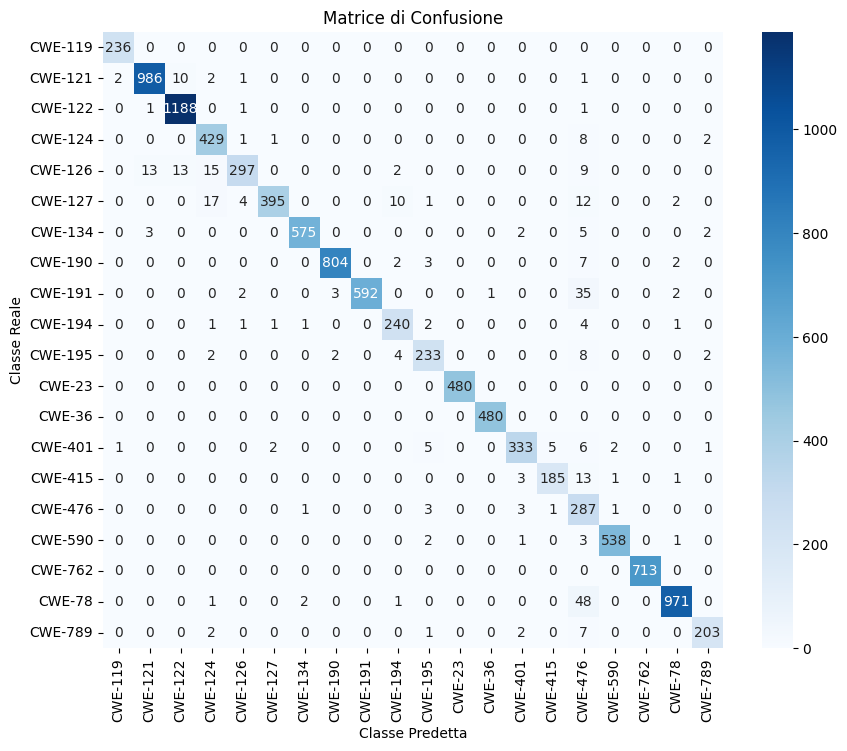

In [ ]:
# prompt: want to generate the confusion matrix

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_true, predicted)

# Creazione del plot della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=onehot_encoder.categories_[0], yticklabels=onehot_encoder.categories_[0])
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()

#🧠 RNN con filter class > 2.000, seq 500, words 20.000

In [ ]:
check_path_RNN = '/content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5'

## Model

In [ ]:
inp = Input(shape=(500, ), name = 'input_layer')

embedding_layer = Embedding(input_dim = WORDS_SIZE,
                            output_dim = 32,
                            name ='embedding_layer')(inp)

x = SpatialDropout1D(0.5, name='spatial_dropout')(embedding_layer)
x = Bidirectional(LSTM(128, return_sequences=False, dropout = 0.5, name='lstm_layer'))(x)
x = Dropout(0.5, name = 'dropout_layer')(x)
x = Dense(64, activation="relu", name = 'dense_layer')(x)
x = Dropout(0.5, name = 'dropout_layer_2')(x)

output = Dense(y_train_encoded.shape[1], activation='softmax', name = 'output')(x)

model_rnn = Model(inputs=inp, outputs = output)
model_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 500)]             0         
                                                                 
 embedding_layer (Embedding  (None, 500, 32)           640000    
 )                                                               
                                                                 
 spatial_dropout (SpatialDr  (None, 500, 32)           0         
 opout1D)                                                        
                                                                 
 bidirectional (Bidirection  (None, 256)               164864    
 al)                                                             
                                                                 
 dropout_layer (Dropout)     (None, 256)               0         
                                                             

In [ ]:
model_rnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', precision_metric, recall_metric])

## Training

In [ ]:
checkpoint = ModelCheckpoint(check_path_RNN, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto", restore_best_weights=True, start_from_epoch=10)

callbacks_list = [checkpoint]

In [ ]:
history = model_rnn.fit(
    x = x_train,
    y = y_train_encoded,
    validation_data = (x_val, y_val_encoded),
    batch_size = 2048,
    epochs = 50,
    callbacks = callbacks_list,
    )

import pickle
with open('/content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 2.4473 - accuracy: 0.1261 - precision: 0.1806 - recall: 4.4452e-04    
Epoch 1: val_loss improved from inf to 2.31642, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
15/15 [==============================] - 23s 590ms/step - loss: 2.4473 - accuracy: 0.1261 - precision: 0.1806 - recall: 4.4452e-04 - val_loss: 2.3164 - val_accuracy: 0.1948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - ETA: 0s - loss: 2.3547 - accuracy: 0.1995 - precision: 0.5000 - recall: 3.4194e-05
Epoch 2: val_loss improved from 2.31642 to 2.19767, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
15/15 [==============================] - 9s 583ms/step - loss: 2.3547 - accuracy: 0.1995 - precision: 0.5000 - recall: 3.4194e-05 - val_loss: 2.1977 - val_accuracy: 0.2520 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 2.0821 - accuracy: 0.2478 - precision: 0.5892 - recall: 0.0294
Epoch 3: val_loss improved from 2.19767 to 1.77256, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
15/15 [==============================] - 8s 556ms/step - loss: 2.0821 - accuracy: 0.2478 - precision: 0.5892 - recall: 0.0294 - val_loss: 1.7726 - val_accuracy: 0.3375 - val_prec

## Test

In [ ]:
model_rnn = tf.keras.models.load_model("/content/drive/My Drive/Sicurezza_approfondimento/RNN_2000_500_20000/ESED/Best_Model/best_RNN_unimb.h5")

In [ ]:
predicted = model_rnn.predict(x_test)

262/262 [==============================] - 4s 13ms/step


In [ ]:
predicted = predicted.argmax(axis=1)
predicted

array([ 4,  6, 10, ...,  2,  6,  4])

In [ ]:
# Convertire le etichette vere da one-hot encoding a etichette semplici
y_test_true = y_test_encoded.argmax(axis=1)
y_test_true

array([ 4,  6, 10, ...,  2,  6,  4])

In [ ]:
from sklearn.metrics import classification_report

#print(classification_report(y_test_encoded, predicted, target_names=label_columns))
report = classification_report(y_test_true, predicted, target_names=onehot_encoder.categories_[0])
print(report)

              precision    recall  f1-score   support

     CWE-121       0.99      0.98      0.99      1002
     CWE-122       0.99      1.00      1.00      1191
     CWE-124       0.95      0.98      0.96       441
     CWE-127       0.98      0.96      0.97       441
     CWE-134       0.98      0.98      0.98       587
     CWE-190       0.99      0.99      0.99       818
     CWE-191       0.97      0.98      0.98       635
      CWE-23       1.00      1.00      1.00       480
      CWE-36       1.00      1.00      1.00       480
     CWE-590       0.99      0.98      0.99       545
     CWE-762       1.00      1.00      1.00       713
      CWE-78       0.99      0.99      0.99      1023

    accuracy                           0.99      8356
   macro avg       0.99      0.99      0.99      8356
weighted avg       0.99      0.99      0.99      8356



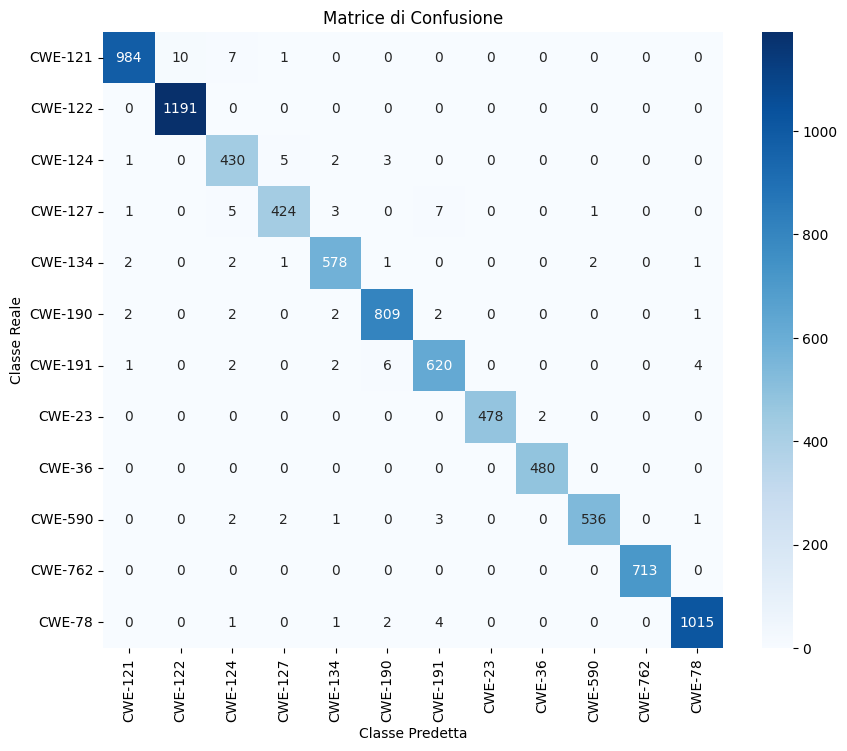

In [ ]:
# prompt: want to generate the confusion matrix

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_true, predicted)

# Creazione del plot della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=onehot_encoder.categories_[0], yticklabels=onehot_encoder.categories_[0])
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()

#🧠 RNN con filter class > 3.000, seq 500, words 20.000

In [ ]:
check_path_RNN = '/content/drive/My Drive/Sicurezza_approfondimento/RNN_3000_500_20000/ESED/Best_Model/best_RNN_unimb.h5'

## Model

In [ ]:
inp = Input(shape=(500, ), name = 'input_layer')

embedding_layer = Embedding(input_dim = WORDS_SIZE,
                            output_dim = 32,
                            name ='embedding_layer')(inp)

x = SpatialDropout1D(0.5, name='spatial_dropout')(embedding_layer)
x = Bidirectional(LSTM(128, return_sequences=False, dropout = 0.5, name='lstm_layer'))(x)
x = Dropout(0.5, name = 'dropout_layer')(x)
x = Dense(64, activation="relu", name = 'dense_layer')(x)
x = Dropout(0.5, name = 'dropout_layer_2')(x)

output = Dense(y_train_encoded.shape[1], activation='softmax', name = 'output')(x)

model_rnn = Model(inputs=inp, outputs = output)
model_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 500)]             0         
                                                                 
 embedding_layer (Embedding  (None, 500, 32)           640000    
 )                                                               
                                                                 
 spatial_dropout (SpatialDr  (None, 500, 32)           0         
 opout1D)                                                        
                                                                 
 bidirectional (Bidirection  (None, 256)               164864    
 al)                                                             
                                                                 
 dropout_layer (Dropout)     (None, 256)               0         
                                                             

In [ ]:
model_rnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', precision_metric, recall_metric])

## Training

In [ ]:
checkpoint = ModelCheckpoint(check_path_RNN, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto", min_delta=0.001, restore_best_weights=True, start_from_epoch=10)

callbacks_list = [checkpoint]

In [ ]:
history = model_rnn.fit(
    x = x_train,
    y = y_train_encoded,
    validation_data = (x_val, y_val_encoded),
    batch_size = 2048,
    epochs = 50,
    callbacks = callbacks_list,
    )

import pickle
with open('/content/drive/My Drive/Sicurezza_approfondimento/RNN_3000_500_20000/ESED/Best_Model/history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.7734 - accuracy: 0.2153 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.72206, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_3000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
10/10 [==============================] - 16s 646ms/step - loss: 1.7734 - accuracy: 0.2153 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7221 - val_accuracy: 0.2947 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 1.6039 - accuracy: 0.3573 - precision: 0.7593 - recall: 0.0370
Epoch 2: val_loss improved from 1.72206 to 1.38204, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_3000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
10/10 [==============================] - 7s 669ms/step - loss: 1.6039 - accuracy: 0.3573 - precision: 0.7593 - recall: 0.0370 - val_loss: 1.3820 - val_accuracy: 0.4764 - val_precision: 1.0000 - val_recall: 0.1271
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.3383 - accuracy: 0.4649 - precision: 0.8228 - recall: 0.1862
Epoch 3: val_loss improved from 1.38204 to 1.06715, saving model to /content/drive/My Drive/Sicurezza_approfondimento/RNN_3000_500_20000/ESED/Best_Model/best_RNN_unimb.h5
10/10 [==============================] - 8s 847ms/step - loss: 1.3383 - accuracy: 0.4649 - precision: 0.8228 - recall: 0.1862 - val_loss: 1.0672 - val_accuracy: 0.5946 - val_precision: 0.9594 - 

## Test

In [ ]:
model_rnn = tf.keras.models.load_model("/content/drive/My Drive/Sicurezza_approfondimento/RNN_3000_500_20000/ESED/Best_Model/best_RNN_unimb.h5")

In [ ]:
predicted = model_rnn.predict(x_test)

169/169 [==============================] - 4s 19ms/step


In [ ]:
predicted = predicted.argmax(axis=1)
predicted

# Convertire le etichette vere da one-hot encoding a etichette semplici
y_test_true = y_test_encoded.argmax(axis=1)
y_test_true

array([5, 3, 2, ..., 4, 3, 0])

In [ ]:
from sklearn.metrics import classification_report

#print(classification_report(y_test_encoded, predicted, target_names=label_columns))
report = classification_report(y_test_true, predicted, target_names=onehot_encoder.categories_[0])
print(report)

              precision    recall  f1-score   support

     CWE-121       0.99      1.00      1.00      1002
     CWE-122       1.00      1.00      1.00      1191
     CWE-190       0.99      0.99      0.99       818
     CWE-191       0.98      0.98      0.98       635
     CWE-762       1.00      1.00      1.00       712
      CWE-78       0.99      0.99      0.99      1024

    accuracy                           0.99      5382
   macro avg       0.99      0.99      0.99      5382
weighted avg       0.99      0.99      0.99      5382



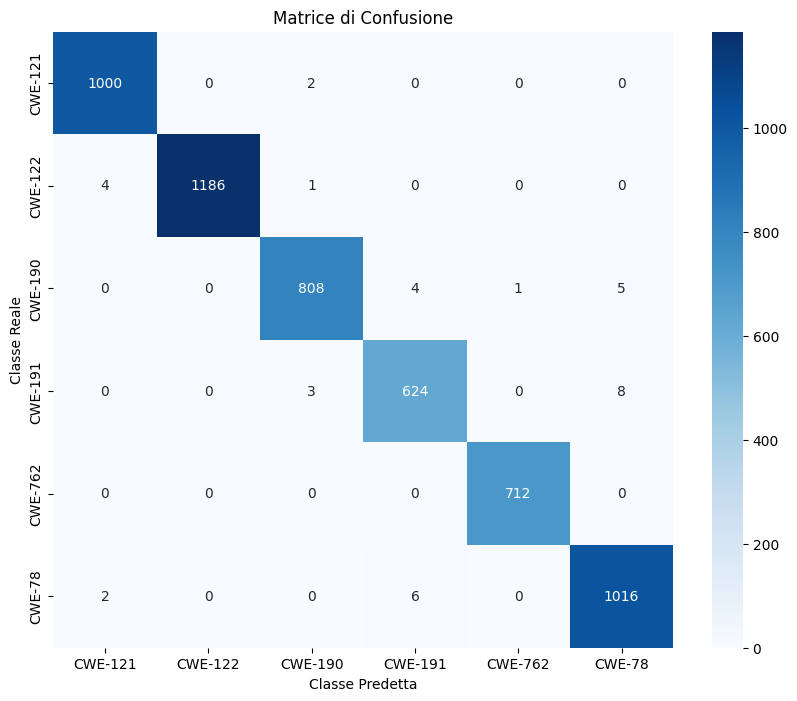

In [ ]:
# prompt: want to generate the confusion matrix

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_true, predicted)

# Creazione del plot della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=onehot_encoder.categories_[0], yticklabels=onehot_encoder.categories_[0])
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()